In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sun May 10 10:44:03 2020

@author: Tejaswiny
"""

'\nCreated on Sun May 10 10:44:03 2020\n\n@author: Tejaswiny\n'

In [ ]:
# IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import math
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix

In [ ]:
# IMPORTING THE DATASET
dataset = pd.read_excel(r'C:\Users\ASUS\Desktop\Project\DataSet.xlsx')

In [4]:
# CHECKING THE VALIDITY OF DATASET
print(dataset.head())

   Year Period  Value
0  1948    M01    3.4
1  1948    M02    3.8
2  1948    M03    4.0
3  1948    M04    3.9
4  1948    M05    3.5


In [5]:
# CHANGING THE NAME OF THE COLUMN PLACEHOLDERS
dataset = dataset.rename(columns={'Value':'UNEMPLOYMENT RATE'})
dataset = dataset.rename(columns={'Year':'YEAR NUMBER'})
dataset = dataset.rename(columns={'Period':'MONTH NUMBER'})
print(dataset.head())

   YEAR NUMBER MONTH NUMBER  UNEMPLOYMENT RATE
0         1948          M01                3.4
1         1948          M02                3.8
2         1948          M03                4.0
3         1948          M04                3.9
4         1948          M05                3.5


In [6]:
# CREATE A NEW TABLE FOR EACH YEAR AND ITS AVG RATE.
info = pd.DataFrame(dataset['YEAR NUMBER'].unique(), columns=['YEAR NUMBER'])

In [7]:
# FIND THE MEAN UNEMPLOYMENT RATE OF EACH YEAR.
sum=0
avg=[]
n=0
for x in range(len(info)):
    for y in range(n,len(dataset)):
        if(dataset['YEAR NUMBER'][y] == info['YEAR NUMBER'][x]):
            sum += dataset['UNEMPLOYMENT RATE'][y]
        else:
            avg.append(sum/12)
            n=y
            sum=0
            break
        if(y == 839): # y will never reach 840, so without this condition, the else condition above will not be activate
            avg.append((sum/12))
            

In [8]:
# COMBINE THE DATA.
info['UNEMPLOYMENT RATE'] = pd.DataFrame(avg, columns=['UNEMPLOYMENT RATE'])

In [9]:
# ROUNDING OFF THE DATA.
info['UNEMPLOYMENT RATE'] = info['UNEMPLOYMENT RATE'].round(2)

In [10]:
# CHECKING.
print(info.head())

   YEAR NUMBER  UNEMPLOYMENT RATE
0         1948               3.75
1         1949               6.05
2         1950               5.21
3         1951               3.28
4         1952               3.03


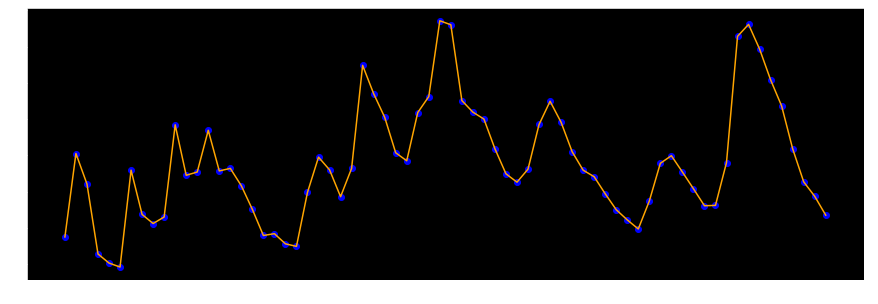

In [11]:
# SHOW THE ACTUAL GRAPH
fig,ax = plt.subplots(figsize=(15,5))
ax.scatter(info['YEAR NUMBER'], info['UNEMPLOYMENT RATE'],color='blue')
ax.plot(info['YEAR NUMBER'], info['UNEMPLOYMENT RATE'],color='orange')

In [12]:
# MORE DETAILING FOR THE YEAR.
ax.locator_params(nbins=15, axis='x')

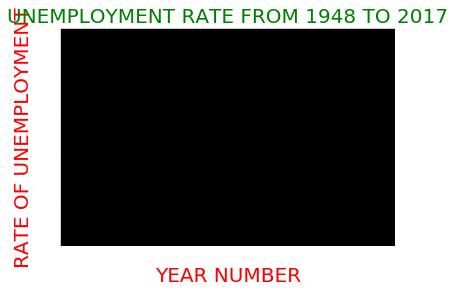

In [13]:
# ADDING DETAILS.
plt.title('UNEMPLOYMENT RATE FROM 1948 TO 2017',fontsize=20,color = 'green')
plt.xlabel( 'YEAR NUMBER',fontsize = 20,color = 'red')
plt.ylabel( 'RATE OF UNEMPLOYMENT',fontsize = 20,color = 'red')
plt.show()

In [14]:
#   WE NNED TO LOG TRANSORM THE 'y' VARIABLE TO TRY TO CONVERT NON-STATIONARY DATA TO STATIONARY.  
info['UNEMPLOYMENT RATE'] = np.log(info['UNEMPLOYMENT RATE'])

In [15]:
# PREPARE THE TRAINING DATA.
d_set = info['UNEMPLOYMENT RATE'].values
train_set = d_set[:50]
X_train = []
Y_train = []
for i in range(30, len(train_set)):
    X_train.append(train_set[i-30:i])
    Y_train.append(train_set[i])

In [16]:
# PREPARE THE TEST SET. 
test_set = d_set[20:]
X_test = []
Y_test = d_set[50:]
for i in range(30, 50):
    X_test.append(train_set[i-30:i]) 

In [17]:
# LINEAR REGRESSION
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
pred_val = regressor.predict(X_test)

In [18]:
# REVERSE THE VALUES FROM LOG 
for i in range(20):
    Y_test[i] = math.exp(Y_test[i])
    pred_val[i] = math.exp(pred_val[i])

In [19]:
# last 20 years
L20y = info['YEAR NUMBER'][50:]

C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.projections.polar.ThetaLocator'>
  # This is added back by InteractiveShellApp.init_path()


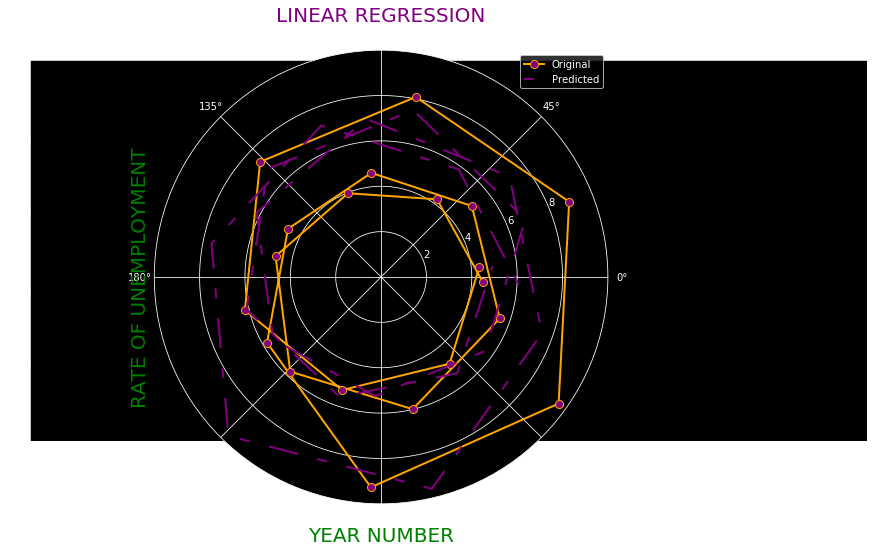

In [20]:
# PLOTTING THE GRAPH.
fig,ax = plt.subplots(figsize=(15,7))
ax = fig.add_axes([0.0, 0.0, .9, .9], polar=True)
one, = ax.plot(L20y, Y_test, color='orange',lw=2,ls='-',marker='o',markersize=8,markerfacecolor="purple")
two, = ax.plot(L20y, pred_val, color='purple',lw=2)
two.set_dashes([5,10,15,10])
plt.legend([one,two],['Original','Predicted'])
plt.xlabel( 'YEAR NUMBER',fontsize = 20,color = 'green')
plt.ylabel( 'RATE OF UNEMPLOYMENT',fontsize = 20,color = 'green')
plt.title('LINEAR REGRESSION',fontsize=20,color='purple')
ax.locator_params(nbins=20, axis='x')

In [32]:
# RANDOM FOREST
rforest = RandomForestRegressor(n_jobs=100)
rforest.fit(X_train, Y_train)
pred_rforest_val = rforest.predict(X_test)
print(pred_rforest_val)
for i in range(20):
    pred_rforest_val[i] = math.exp(pred_rforest_val[i])


C:\Users\ASUS\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.85679876 1.82144222 1.95129622 2.00112582 2.15365615 2.1848897
 2.03321869 1.98659862 1.89790377 1.89235117 1.79520631 1.67999122
 1.7197116  1.8593166  1.98184431 1.89916672 1.82555393 1.73848341
 1.69198333 1.6311765 ]


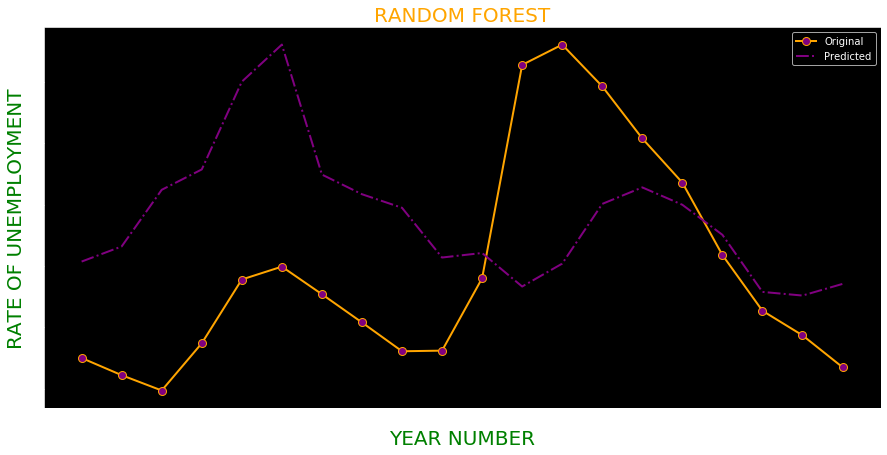

In [22]:
# PLOTTING THE GRAPH   
fig,ax = plt.subplots(figsize=(15,7))
one, = ax.plot(L20y, Y_test, color='orange',lw=2,ls='-',marker='o',markersize=8,markerfacecolor="purple")
two, = ax.plot(L20y, pred_rforest_val, color='purple',lw=2,ls='-.')
plt.legend([one,two],['Original','Predicted'])
plt.xlabel( 'YEAR NUMBER',fontsize = 20,color = 'green')
plt.ylabel( 'RATE OF UNEMPLOYMENT',fontsize = 20,color = 'green')
plt.title('RANDOM FOREST',fontsize=20,color='orange')
ax.locator_params(nbins=20, axis='x')

In [31]:
# KNN
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, Y_train)
pred_knn_val= knn.predict(X_test)
print(pred_knn_val)
for i in range(20):
    pred_knn_val[i] = math.exp(pred_knn_val[i])


[1.80335861 1.76644166 1.97129938 2.03077637 2.27315628 2.2617631
 2.01623547 1.97269117 1.94591015 1.82131827 1.70292826 1.66013103
 1.72633166 1.92424865 2.0135688  1.93296964 1.80828877 1.72097929
 1.68824909 1.59736533]


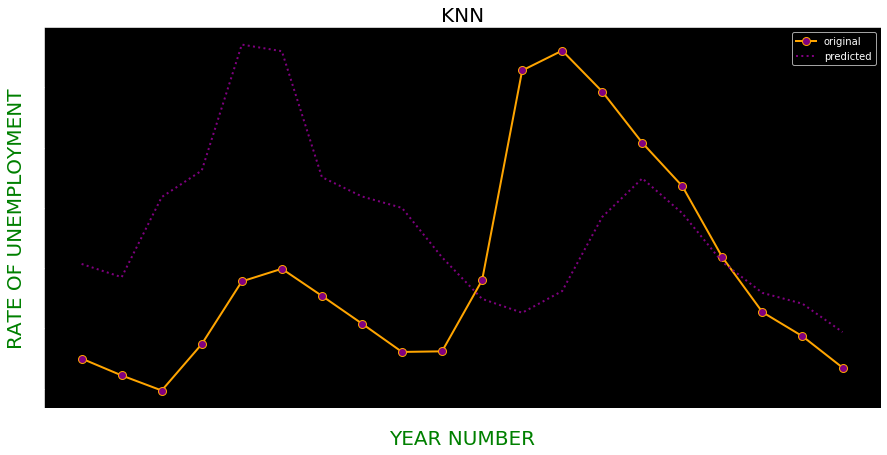

In [24]:
# PLOTTING THE GRAPH
fig,ax = plt.subplots(figsize=(15,7))
#ax = fig.add_axes([0.0, 0.0, .9, .9], polar=True)
one, = ax.plot(L20y, Y_test, color='orange',lw=2,ls='-',marker='o',markersize=8,markerfacecolor="purple")
two, = ax.plot(L20y, pred_knn_val, color='purple',lw=2,ls=':')
plt.legend([one,two],['original','predicted'])
plt.xlabel( 'YEAR NUMBER',fontsize = 20,color = 'green')
plt.ylabel( 'RATE OF UNEMPLOYMENT',fontsize = 20,color = 'green')
plt.title('KNN',fontsize=20,color='black')
ax.locator_params(nbins=20, axis='x')

Text(0.5, 1.0, 'OVERALL COMPARISON')

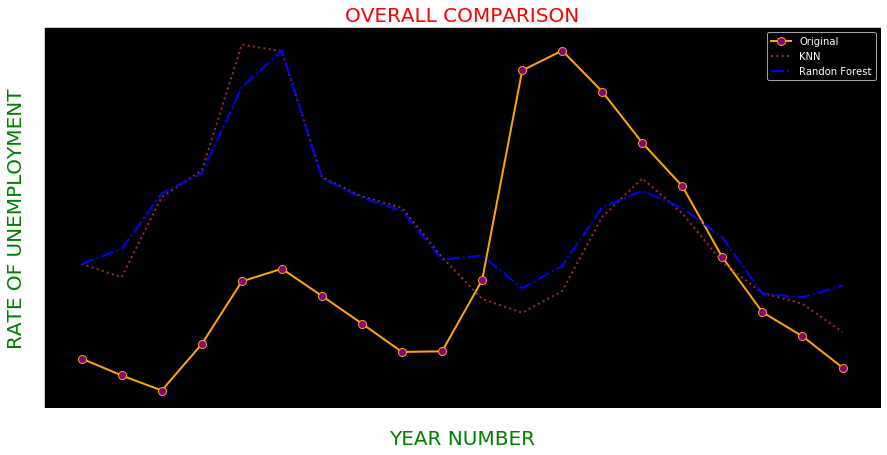

In [25]:
# OVERALL GRAPH REPRESENTATION

fig,ax = plt.subplots(figsize=(15,7))
#ax = fig.add_axes([0.0, 0.0, 0.9, 0.9], polar=True)
a, = ax.plot(L20y, Y_test, color='orange',lw=2,ls='-',marker='o',markersize=8,markerfacecolor="purple")
b, = ax.plot(L20y, pred_knn_val, color='brown',lw =2,ls=':')
c, = ax.plot(L20y, pred_rforest_val, color='blue',lw =2,ls='-.')
plt.xlabel( 'YEAR NUMBER',fontsize = 20,color = 'green')
plt.ylabel( 'RATE OF UNEMPLOYMENT',fontsize = 20,color = 'green')
plt.legend([a,b,c],['Original', 'KNN','Randon Forest'])
plt.title('OVERALL COMPARISON',fontsize=20,color = 'red')
